In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import numpy as np
# Set the style to 'whitegrid'
plt.style.use('seaborn-whitegrid')

C:\Users\janak\AppData\Local\Temp\ipykernel_29824\3836125493.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


# Covid data analysis

## API

In [57]:
import requests

country = 'Sri Lanka'
region='galle'
api_url = 'https://api.api-ninjas.com/v1/covid19?country={}'.format(country,region)
response = requests.get(api_url, headers={'X-Api-Key': 'ChFX2bim+4wKPTz29XhdDA==AnPaGTh554GAAJiB'})
if response.status_code == requests.codes.ok:
    print(response.text)
    print(type(response.text))
else:
    print("Error:", response.status_code, response.text)

[{"country": "Sri Lanka", "region": "", "cases": {"2020-01-22": {"total": 0, "new": 0}, "2020-01-23": {"total": 0, "new": 0}, "2020-01-24": {"total": 0, "new": 0}, "2020-01-25": {"total": 0, "new": 0}, "2020-01-26": {"total": 0, "new": 0}, "2020-01-27": {"total": 1, "new": 1}, "2020-01-28": {"total": 1, "new": 0}, "2020-01-29": {"total": 1, "new": 0}, "2020-01-30": {"total": 1, "new": 0}, "2020-01-31": {"total": 1, "new": 0}, "2020-02-01": {"total": 1, "new": 0}, "2020-02-02": {"total": 1, "new": 0}, "2020-02-03": {"total": 1, "new": 0}, "2020-02-04": {"total": 1, "new": 0}, "2020-02-05": {"total": 1, "new": 0}, "2020-02-06": {"total": 1, "new": 0}, "2020-02-07": {"total": 1, "new": 0}, "2020-02-08": {"total": 1, "new": 0}, "2020-02-09": {"total": 1, "new": 0}, "2020-02-10": {"total": 1, "new": 0}, "2020-02-11": {"total": 1, "new": 0}, "2020-02-12": {"total": 1, "new": 0}, "2020-02-13": {"total": 1, "new": 0}, "2020-02-14": {"total": 1, "new": 0}, "2020-02-15": {"total": 1, "new": 0}, 

In [58]:
import json

# API response content
response_content = response.text
# Convert response content to JSON
data = json.loads(response_content)

# Create DataFrame directly
df = pd.DataFrame(data[0]['cases']).T.reset_index()
df = df.rename(columns={'index': 'date'})

# Add country and region columns
df['country'] = data[0]['country']
df['region'] = data[0]['region']

# Reorder columns
df = df[['country', 'region', 'date', 'total', 'new']]

# Print DataFrame
df.tail(10)


,country,region,date,total,new
1133,Sri Lanka,,2023-02-28,672030,1
1134,Sri Lanka,,2023-03-01,672031,1
1135,Sri Lanka,,2023-03-02,672031,0
1136,Sri Lanka,,2023-03-03,672032,1
1137,Sri Lanka,,2023-03-04,672032,0
1138,Sri Lanka,,2023-03-05,672034,2
1139,Sri Lanka,,2023-03-06,672034,0
1140,Sri Lanka,,2023-03-07,672036,2
1141,Sri Lanka,,2023-03-08,672037,1
1142,Sri Lanka,,2023-03-09,672039,2


In [61]:
df[['country','region']].value_counts()

country    region
Sri Lanka            1143
Name: count, dtype: int64

In [62]:
df.drop(columns=['region', 'country'],inplace=True)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1143 non-null   object
 1   total   1143 non-null   int64 
 2   new     1143 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 26.9+ KB


In [64]:
try:
    # Convert 'Current_Date' to DateTime format
    df['date'] = pd.to_datetime(df['date'])
    print("Conversion to DateTime format successful.")
except ValueError as e:
    print(f"Error converting to DateTime format: {e}")

Conversion to DateTime format successful.


In [66]:
df.describe()

,date,total,new
count,1143,1143.000000,1143.00000
mean,2021-08-15 00:00:00,345019.684164,587.96063
min,2020-01-22 00:00:00,0.000000,0.00000
25%,2020-11-02 12:00:00,11539.500000,8.00000
50%,2021-08-15 00:00:00,354968.000000,99.00000
75%,2022-05-27 12:00:00,663808.000000,719.00000
max,2023-03-09 00:00:00,672039.000000,11366.00000
std,NaN,292757.607554,1064.34241


In [67]:
# Step 1: Check Time Range
min_date = df['date'].min()
max_date = df['date'].max()
print("Time Range: From", min_date, "to", max_date)

# Step 2: Generate Time Range
complete_time_range = pd.date_range(start=min_date, end=max_date, freq='D')  
# Step 3: Identify Missing Values
missing_values = complete_time_range[~complete_time_range.isin(df['date'])]

if len(missing_values) == 0:
    print("No missing dates found in the time range.")
else:
    print("Missing dates found:")
    print('Count: ',len(missing_values))
    print(missing_values)


Time Range: From 2020-01-22 00:00:00 to 2023-03-09 00:00:00
No missing dates found in the time range.


In [68]:
df.set_index('date', inplace=True)

In [69]:
df.isnull().sum()

total    0
new      0
dtype: int64

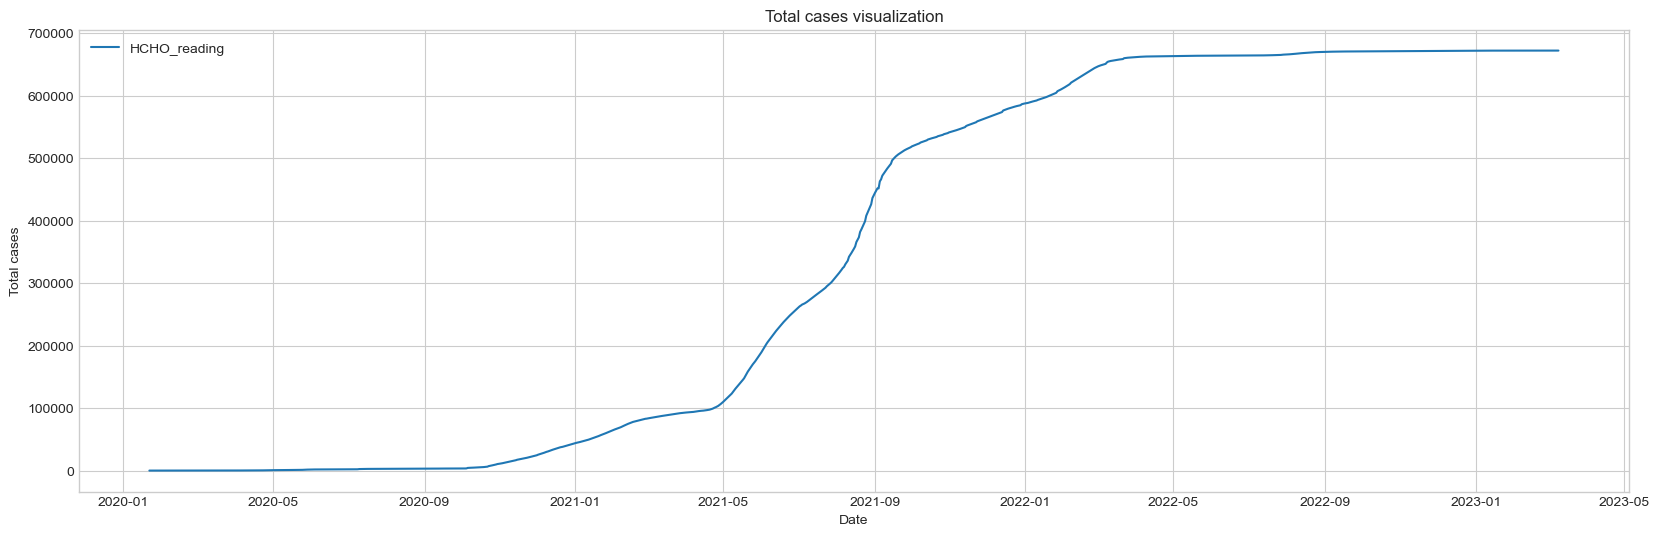

In [70]:
# Create the plot
plt.figure(figsize=(20, 6))
plt.plot( df.index, df["total"], label="HCHO_reading")
plt.title("Total cases visualization")
plt.xlabel("Date")
plt.ylabel("Total cases")
plt.legend()
plt.show()

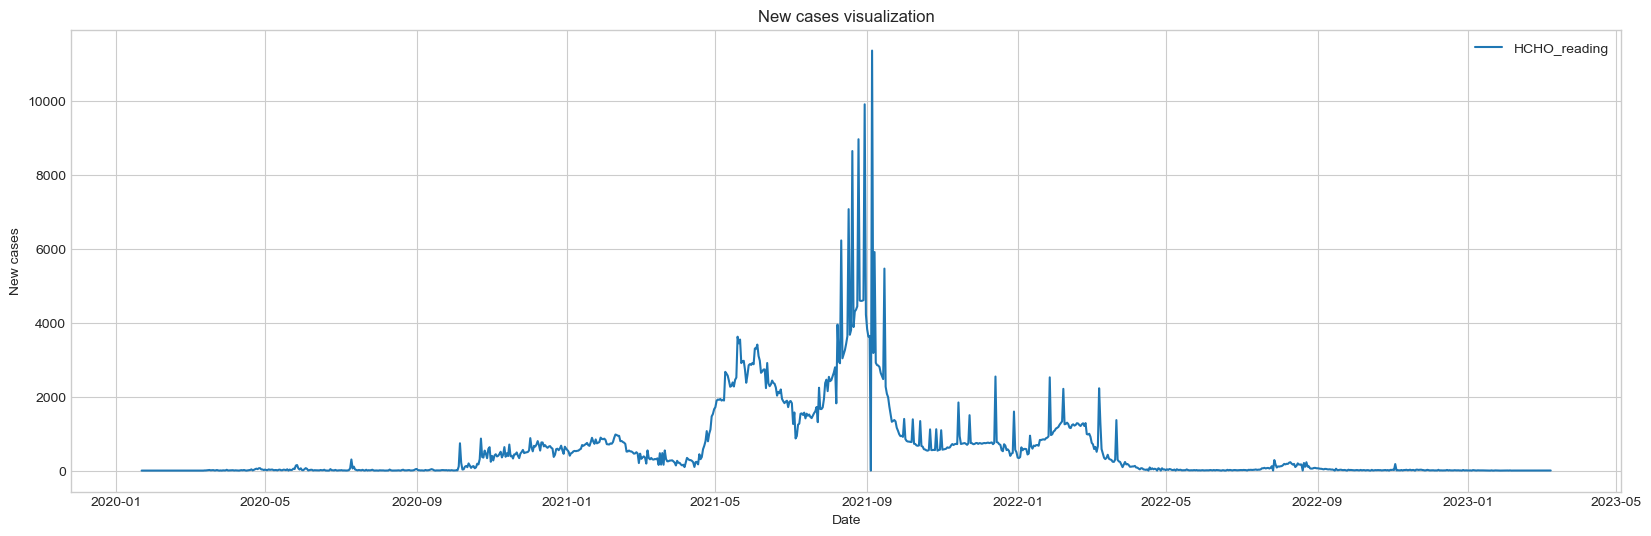

In [71]:
# Create the plot
plt.figure(figsize=(20, 6))
plt.plot( df.index, df["new"], label="HCHO_reading")
plt.title("New cases visualization")
plt.xlabel("Date")
plt.ylabel("New cases")
plt.legend()
plt.show()

# Population data

In [129]:
population= pd.read_csv('raw_data\population.csv')
population

,District,2017,2018,2019,2020,2021,2022,2023
0,Colombo,"2,419","2,439","2,448","2,455","2,480","2,478","2,460"
1,Gampaha,"2,391","2,409","2,417","2,423","2,443","2,439","2,421"
2,Kalutara,"1,271","1,281","1,284","1,287","1,296","1,292","1,279"
3,Kandy,"1,452","1,468","1,476","1,483","1,501","1,499","1,482"
4,Matale,514,519,522,525,530,530,525
5,Nuwara-eliya,756,763,768,773,780,783,781
6,Galle,"1,113","1,124","1,130","1,135","1,147","1,147","1,139"
7,Matara,851,858,863,866,873,874,869
8,Hambantota,647,655,661,668,676,681,680
9,Jaffna,608,613,617,621,626,629,628


In [130]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   District  25 non-null     object
 1   2017      25 non-null     object
 2   2018      25 non-null     object
 3   2019      25 non-null     object
 4   2020      25 non-null     object
 5   2021      25 non-null     object
 6   2022      25 non-null     object
 7   2023      25 non-null     object
dtypes: object(8)
memory usage: 1.7+ KB


In [131]:
population.drop(columns=['2017','2018'],inplace=True)

In [132]:
districts_to_keep=['Colombo','Kandy','Nuwara-eliya', 'Matara','Monaragala','Jaffna','Kurunegala']
population=population[population['District'].isin(districts_to_keep)]
population

,District,2019,2020,2021,2022,2023
0,Colombo,"2,448","2,455","2,480","2,478","2,460"
3,Kandy,"1,476","1,483","1,501","1,499","1,482"
5,Nuwara-eliya,768,773,780,783,781
7,Matara,863,866,873,874,869
9,Jaffna,617,621,626,629,628
17,Kurunegala,"1,719","1,726","1,743","1,742","1,727"
22,Monaragala,496,501,505,509,509


In [133]:
population = population.melt(id_vars='District', var_name='Year', value_name='Population')
population = population.sort_values(by=['District','Year'])
population

,District,Year,Population
0,Colombo,2019,"2,448"
7,Colombo,2020,"2,455"
14,Colombo,2021,"2,480"
21,Colombo,2022,"2,478"
28,Colombo,2023,"2,460"
4,Jaffna,2019,617
11,Jaffna,2020,621
18,Jaffna,2021,626
25,Jaffna,2022,629
32,Jaffna,2023,628


In [134]:
population['Population'] = population['Population'].str.replace(',', '').astype(int)*1000
population.info()

,District,Year,Population
0,Colombo,2019,2448000
7,Colombo,2020,2455000
14,Colombo,2021,2480000
21,Colombo,2022,2478000
28,Colombo,2023,2460000
4,Jaffna,2019,617000
11,Jaffna,2020,621000
18,Jaffna,2021,626000
25,Jaffna,2022,629000
32,Jaffna,2023,628000


In [135]:
areas=pd.read_csv(r"C:\Users\janak\OneDrive\Desktop\DE CW\land_areas_of_sri_lanka.csv")

areas.drop(columns=['Land ',' Inland waters','Unnamed: 4'],inplace=True)
areas.dropna(inplace=True)

replacement_dict = {'Moneragala': 'Monaragala', 'Nuwara Eliya': 'Nuwara-eliya'}
areas[' / District'] = areas[' / District'].replace(replacement_dict)
areas= areas[areas[' / District'].isin(districts_to_keep)]

areas['Total '] = areas['Total '].astype('float64')
areas.columns = ['District','Area(km^2)']
areas

,District,Area(km^2)
2,Colombo,698.7
6,Kandy,1939.5
8,Nuwara-eliya,1741.2
11,Matara,1282.5
14,Jaffna,1025.3
24,Kurunegala,4815.8
31,Monaragala,5638.7


In [136]:
merged_df = pd.merge(areas, population, how='inner', left_on='District', right_on='District')
merged_df

,District,Area(km^2),Year,Population
0,Colombo,698.7,2019,2448000
1,Colombo,698.7,2020,2455000
2,Colombo,698.7,2021,2480000
3,Colombo,698.7,2022,2478000
4,Colombo,698.7,2023,2460000
5,Kandy,1939.5,2019,1476000
6,Kandy,1939.5,2020,1483000
7,Kandy,1939.5,2021,1501000
8,Kandy,1939.5,2022,1499000
9,Kandy,1939.5,2023,1482000


In [137]:
merged_df['Population_density'] = merged_df.apply(lambda row: row['Population'] / row['Area(km^2)'], axis=1)
merged_df

,District,Area(km^2),Year,Population,Population_density
0,Colombo,698.7,2019,2448000,3503.649635
1,Colombo,698.7,2020,2455000,3513.668241
2,Colombo,698.7,2021,2480000,3549.448977
3,Colombo,698.7,2022,2478000,3546.586518
4,Colombo,698.7,2023,2460000,3520.824388
5,Kandy,1939.5,2019,1476000,761.020882
6,Kandy,1939.5,2020,1483000,764.630059
7,Kandy,1939.5,2021,1501000,773.910802
8,Kandy,1939.5,2022,1499000,772.879608
9,Kandy,1939.5,2023,1482000,764.114462


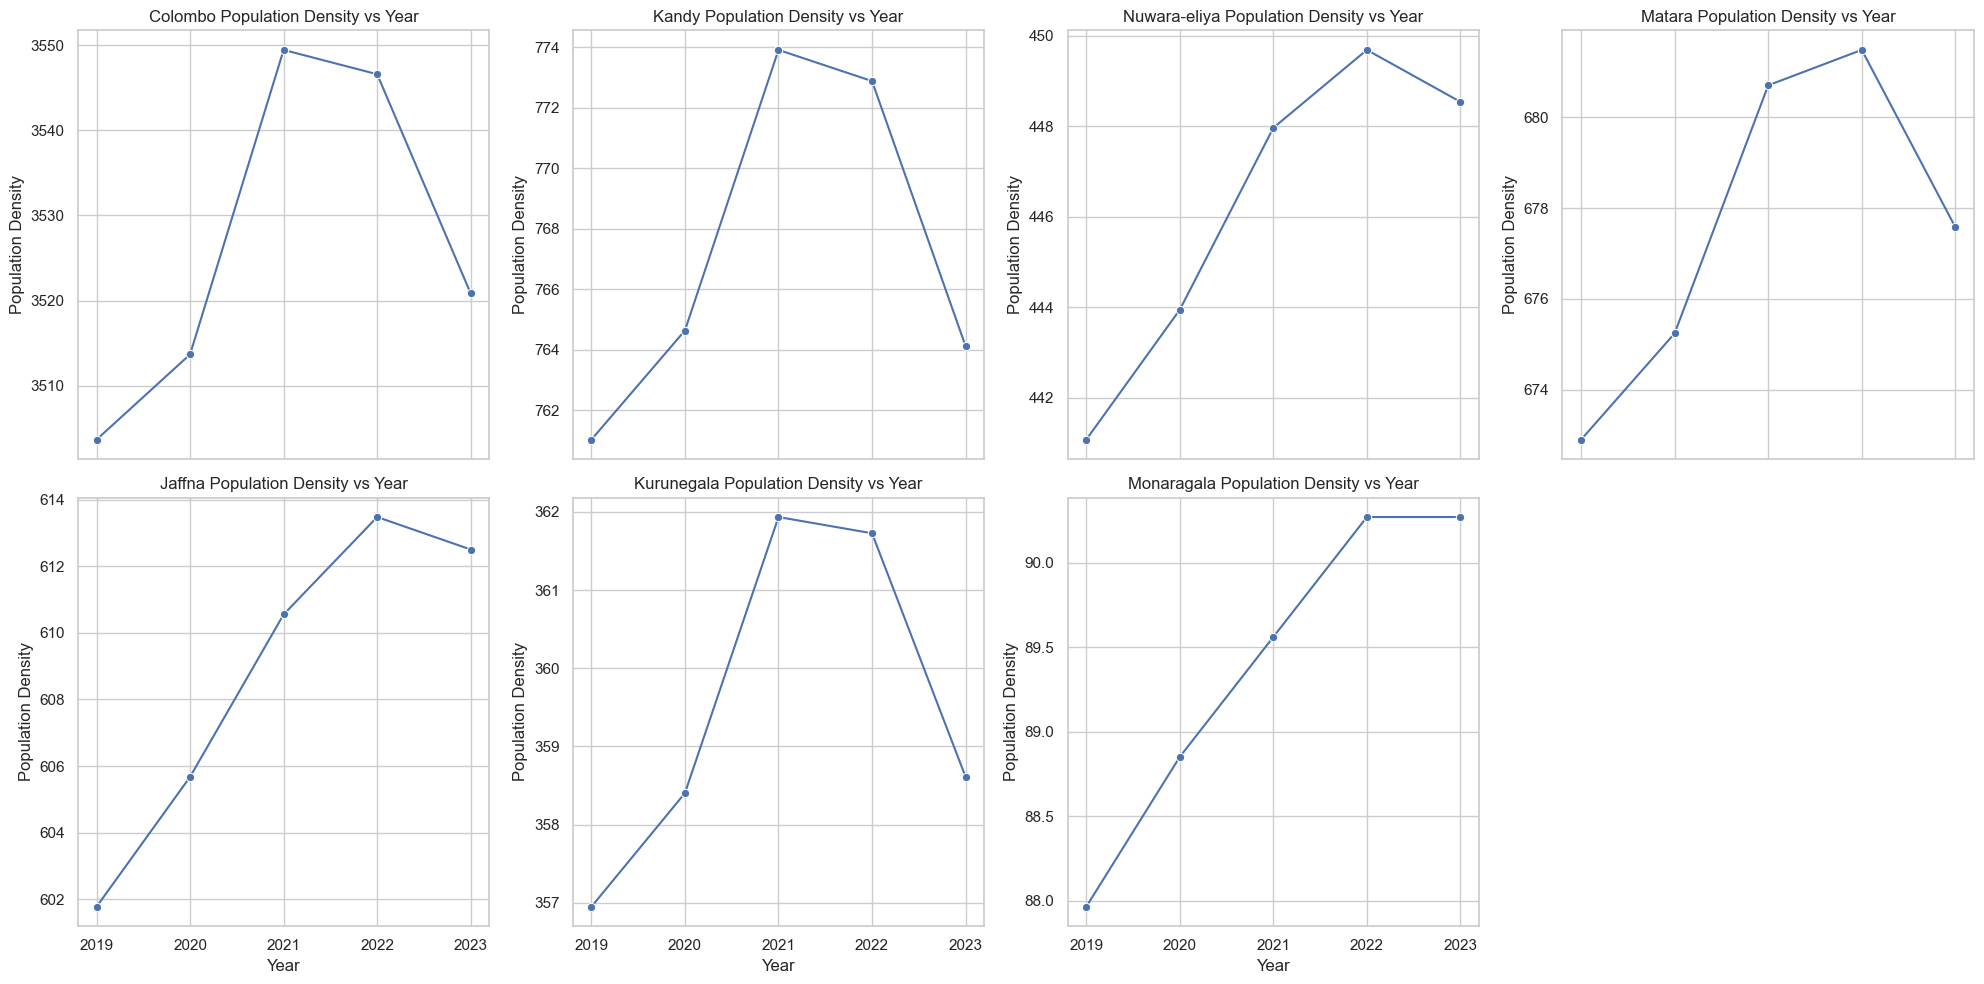

In [149]:
# Get unique districts
districts = merged_df['District'].unique()

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10), sharex=True)

# Flatten axes for easy iteration
axes = axes.flatten()

# Iterate through each district
for i, district in enumerate(districts):
    # Filter data for the current district
    data = merged_df[merged_df['District'] == district]
    
    # Plot population density vs year
    sns.lineplot(data=data, x='Year', y='Population_density', marker='o', ax=axes[i])
    axes[i].set_title(f'{district} Population Density vs Year')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Population Density')

# Hide remaining axes
for j in range(len(districts), len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()
